In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

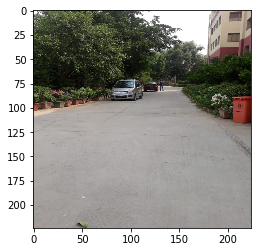

In [6]:
img=cv2.imread("./Data/images/IMG-20190708-WA0000.jpg")
img=cv2.resize(img,(224,224))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

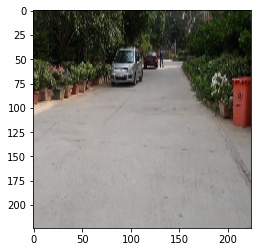

In [23]:
#translation or cropping 1
rows,cols,_ = img.shape
dst=img
M = np.float32([[1,0,0],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
M = np.float32([[1,0,0],[0,1,-50]])
dst = cv2.warpAffine(dst,M,(cols,rows))
dst=dst[50:-50,:,:]
plt.imshow(cv2.resize(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB),(224,224)))

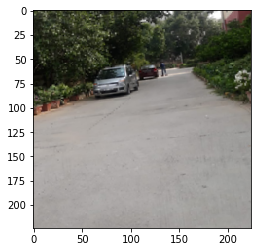

In [47]:
# Rotation and Scaling 2 
rows,cols,_ = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),7,1.4)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(cv2.resize(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB),(224,224)))

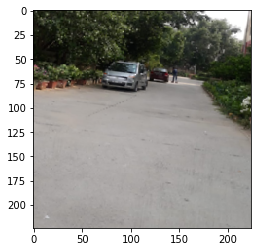

In [48]:
# Rotation and Scaling 3
rows,cols,_ = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),-7,1.4)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(cv2.resize(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB),(224,224)))

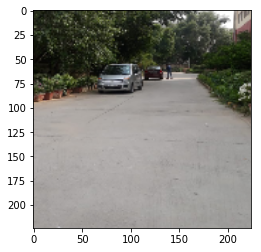

In [51]:
# Scaling 4
rows,cols,_ = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),0,1.4)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(cv2.resize(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB),(224,224)))

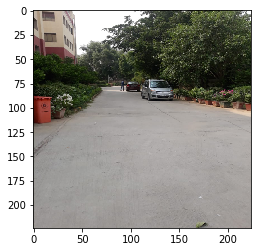

In [45]:
#FLIP 5
dst=cv2.flip(img,1)
plt.imshow(cv2.resize(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB),(224,224)))